# Importing Libraries and data

In [55]:
# Import the pandas library, which is a popular data manipulation and analysis library in Python
import pandas as pd

# Specify the file path of the CSV file you want to read
file ="C:\\Users\\pbhar\\Downloads\\Yelp Restaurant Reviews.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file)

# Display the first 20 rows of the DataFrame
df.head(20)

Yelp URL  Rating       year  \
0   https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  1/22/2022   
1   https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  6/26/2022   
2   https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   8/7/2021   
3   https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  7/28/2016   
4   https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  6/23/2015   
5   https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   5/1/2019   
6   https://www.yelp.com/biz/sidney-dairy-barn-sidney       1  8/11/2016   
7   https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  11/5/2016   
8   https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  8/19/2015   
9   https://www.yelp.com/biz/sidney-dairy-barn-sidney       2  7/26/2019   
10  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  3/30/2015   
11  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  5/18/2018   
12  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   5/5/2018   
13  https://www.yelp.com/biz/sidney-dairy-barn-sidney       3   9/4/2014   
14  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  7/22/2016   
15  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   7/6/2016   
16  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   7/6/2016   
17  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  6/25/2016   
18  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  11/1/2016   
19  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  6/18/2013   

                                          Review Text  
0   All I can say is they have very good ice cream...  
1   Nice little local place for ice cream.My favor...  
2   A delicious treat on a hot day! Staff was very...  
3   This was great service and a fun crew! I got t...  
4   This is one of my favorite places to get ice c...  
5   I've been coming to this ice cream stand since...  
6   The soft-serve is way too sweet and has a stra...  
7   My husband and I stopped here on the way back ...  
8   Little piece of heaven, the best ice cream sho...  
9   Went here for the 1st time tonight. I ordered ...  
10  Our bike club comes here often year round for ...  
11  Best ice cream in the area! I love their featu...  
12  Delicious ice cream. Best soft serve I've ever...  
13  Local Dairy Barn that served your typical trad...  
14  The best soft serve hands down...no further ex...  
15  Best home made style ice cream. I stop by any ...  
16  Definitely have to check out their facebook fo...  
17  Much better than Champaign's Jarlings. Better ...  
18  Basically the best thing since sliced bread. D...  
19  I LOVE the Dairy Barn. 20 minutes east of CU, ...

# Look at a couple of texts

In [58]:
# Print the first 400 characters of the "text" column for the row at index 2666
print(repr(df.iloc[2000]["Review Text"][0:400]))

# Print the first 400 characters of the "text" column for the row at index 4726
print(repr(df.iloc[2000]["Review Text"][0:400]))

"This ice cream is absolutely fantastic to me. My daughter brought some of this stuff home because her boyfriend took her and she loved it. I'm glad she was thoughtful enough to do that. The flavors are very natural and it's almost dangerous because I know I could eat the whole pint in one sitting. All I got to say is that it is a must try if you haven't already. Let me know what you think."
"This ice cream is absolutely fantastic to me. My daughter brought some of this stuff home because her boyfriend took her and she loved it. I'm glad she was thoughtful enough to do that. The flavors are very natural and it's almost dangerous because I know I could eat the whole pint in one sitting. All I got to say is that it is a must try if you haven't already. Let me know what you think."


# Text Preprocessing and Splitting

In [115]:
# Import the re (regular expression) module
import re
# Apply a lambda function to the "text" column
# The lambda function splits the text into paragraphs using the regular expression pattern '\.\s*\n'
df["paragraphs"] = df["Review Text"].map(lambda text: re.split('\.\s*\n', text))
# Create a new column "number_of_paragraphs"
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## installing spacy

In [61]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


## TF-IDF Vectorization of Text Data

In [69]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
tfidf_text_vectorizer = TfidfVectorizer(stop_words='english',
min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the DataFrame and transform it into a sparse matrix
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['Review Text'])
# Print the shape of the resulting sparse matrix
tfidf_text_vectors.shape

(19896, 7282)

# Data frame of sentences

In [94]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "Review Text": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["year"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

Review Text       year
0  All I can say is they have very good ice cream...  1/22/2022
1  Nice little local place for ice cream.My favor...  6/26/2022
2  A delicious treat on a hot day! Staff was very...   8/7/2021
3  This was great service and a fun crew! I got t...  7/28/2016
4  This is one of my favorite places to get ice c...  6/23/2015
5  I've been coming to this ice cream stand since...   5/1/2019
6  The soft-serve is way too sweet and has a stra...  8/11/2016
7  My husband and I stopped here on the way back ...  11/5/2016
8  Little piece of heaven, the best ice cream sho...  8/19/2015
9  Went here for the 1st time tonight. I ordered ...  7/26/2019

# TFIDF of the sentences DF

In [96]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the STOP_WORDS set from the spacy.lang.en module
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
# Fit the TfidfVectorizer on the 'text' column of the paragraph_df DataFrame and transform it into a sparse matrix
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["Review Text"])
# Print the shape of the resulting sparse matrix
tfidf_para_vectors.shape

(19896, 7282)

# NMF Topic Modeling

In [97]:
# Import the NMF class from the sklearn.decomposition module
from sklearn.decomposition import NMF

In [98]:
# Create an instance of the NMF class with 10 components (topics) and a random state of 42
nmf_text_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the tfidf_text_vectors (document-term matrix) and transform it to obtain the document-topic matrix
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)

# Get the topic-word matrix from the fitted NMF model
H_text_matrix = nmf_text_model.components_

C:\Users\pbhar\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## LDA Topic Modeling

In [99]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]]*100.0/total)))
            
# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())
    


Topic 00
 ice (7.42)
 cream (7.15)
 flavors (1.45)
 best (1.36)
 shop (0.72)

Topic 01
 coffee (1.87)
 bakery (1.76)
 pastries (1.49)
 macarons (1.17)
 croissant (1.00)

Topic 02
 donuts (7.03)
 donut (5.68)
 creme (1.09)
 bar (1.04)
 brã (0.76)

Topic 03
 milk (4.73)
 cereal (3.49)
 soft (3.14)
 serve (3.10)
 pie (2.54)

Topic 04
 cupcake (7.94)
 cupcakes (5.15)
 sprinkles (3.13)
 velvet (2.81)
 red (2.79)

Topic 05
 great (6.55)
 place (3.17)
 service (2.92)
 friendly (2.76)
 staff (2.55)

Topic 06
 chocolate (4.80)
 cookie (2.50)
 butter (1.99)
 peanut (1.56)
 chip (1.34)

Topic 07
 cake (9.07)
 birthday (2.42)
 slice (1.57)
 cakes (1.22)
 dry (0.85)

Topic 08
 love (11.21)
 place (3.18)
 favorite (1.53)
 flavors (0.94)
 salted (0.76)

Topic 09
 line (1.36)
 good (0.93)
 just (0.93)
 time (0.91)
 wait (0.85)


## Topic Modeling with TF-IDF Vectorization and NMF

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have tfidf_text_vectorizer defined

# Get feature names from the TfidfVectorizer object
feature_names = tfidf_text_vectorizer.get_feature_names_out()

# Now, use the display_topics function with the correct feature names
display_topics(nmf_text_model, feature_names)


Topic 00
 ice (7.42)
 cream (7.15)
 flavors (1.45)
 best (1.36)
 shop (0.72)

Topic 01
 coffee (1.87)
 bakery (1.76)
 pastries (1.49)
 macarons (1.17)
 croissant (1.00)

Topic 02
 donuts (7.03)
 donut (5.68)
 creme (1.09)
 bar (1.04)
 brã (0.76)

Topic 03
 milk (4.73)
 cereal (3.49)
 soft (3.14)
 serve (3.10)
 pie (2.54)

Topic 04
 cupcake (7.94)
 cupcakes (5.15)
 sprinkles (3.13)
 velvet (2.81)
 red (2.79)

Topic 05
 great (6.55)
 place (3.17)
 service (2.92)
 friendly (2.76)
 staff (2.55)

Topic 06
 chocolate (4.80)
 cookie (2.50)
 butter (1.99)
 peanut (1.56)
 chip (1.34)

Topic 07
 cake (9.07)
 birthday (2.42)
 slice (1.57)
 cakes (1.22)
 dry (0.85)

Topic 08
 love (11.21)
 place (3.18)
 favorite (1.53)
 flavors (0.94)
 salted (0.76)

Topic 09
 line (1.36)
 good (0.93)
 just (0.93)
 time (0.91)
 wait (0.85)


## Discovering Topics in Paragraphs using NMF

In [101]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 ice (7.42)
 cream (7.15)
 flavors (1.45)
 best (1.36)
 shop (0.72)

Topic 01
 coffee (1.87)
 bakery (1.76)
 pastries (1.49)
 macarons (1.17)
 croissant (1.00)

Topic 02
 donuts (7.03)
 donut (5.68)
 creme (1.09)
 bar (1.04)
 brã (0.76)

Topic 03
 milk (4.73)
 cereal (3.49)
 soft (3.14)
 serve (3.10)
 pie (2.54)

Topic 04
 cupcake (7.94)
 cupcakes (5.15)
 sprinkles (3.13)
 velvet (2.81)
 red (2.79)

Topic 05
 great (6.55)
 place (3.17)
 service (2.92)
 friendly (2.76)
 staff (2.55)

Topic 06
 chocolate (4.80)
 cookie (2.50)
 butter (1.99)
 peanut (1.56)
 chip (1.34)

Topic 07
 cake (9.07)
 birthday (2.42)
 slice (1.57)
 cakes (1.22)
 dry (0.85)

Topic 08
 love (11.21)
 place (3.18)
 favorite (1.53)
 flavors (0.94)
 salted (0.76)

Topic 09
 line (1.36)
 good (0.93)
 just (0.93)
 time (0.91)
 wait (0.85)


C:\Users\pbhar\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## Percentage Contribution of Topics in Document-Term Matrix 

In [102]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([13.59446425, 10.58775024,  7.39651928,  7.13245516,  5.73648599,
       12.16063677, 12.12972403,  7.32273148,  9.08454129, 14.8546915 ])

## Topic Contribution Percentage in Paragraphs

In [103]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([13.59446425, 10.58775024,  7.39651928,  7.13245516,  5.73648599,
       12.16063677, 12.12972403,  7.32273148,  9.08454129, 14.8546915 ])

## Count Vectorization with Stopwords Removed



In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Review Text"])
count_para_vectors.shape


(19896, 7282)

## LDA Topic Modeling on Paragraph Count Vectors

In [107]:
lda_para_model = LatentDirichletAllocation(n_components = 10,
random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Review Text"])
print(count_para_vectors.shape)


C:\Users\pbhar\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(19896, 7290)


## Displaying Topics from LDA Model

In [109]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
piqued granted coconutty goin losing

Topic 2:
crawl hurt flamingo suspicious flake

Topic 3:
dollop dollar piqued goin creature

Topic 4:
hurt crawl piqued flamingo granted

Topic 5:
midwest socializing sentence century picking

Topic 6:
chocolat car goin crawl tastiness

Topic 7:
bakery critical luxury chocolat bottles

Topic 8:
cake cult like juice culture

Topic 9:
lies juice chocolat crawl goin

Topic 10:
variations ticket juice series lies


## para matrix

In [110]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([13.38571346, 10.12935264,  8.5643375 , 20.04327752,  7.96201663,
        5.43313809,  7.41686112, 15.20313768,  5.0412688 ,  6.82089656])

## Word Cloud Visualization of Topics

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

## Generating Word Clouds for NMF Topics

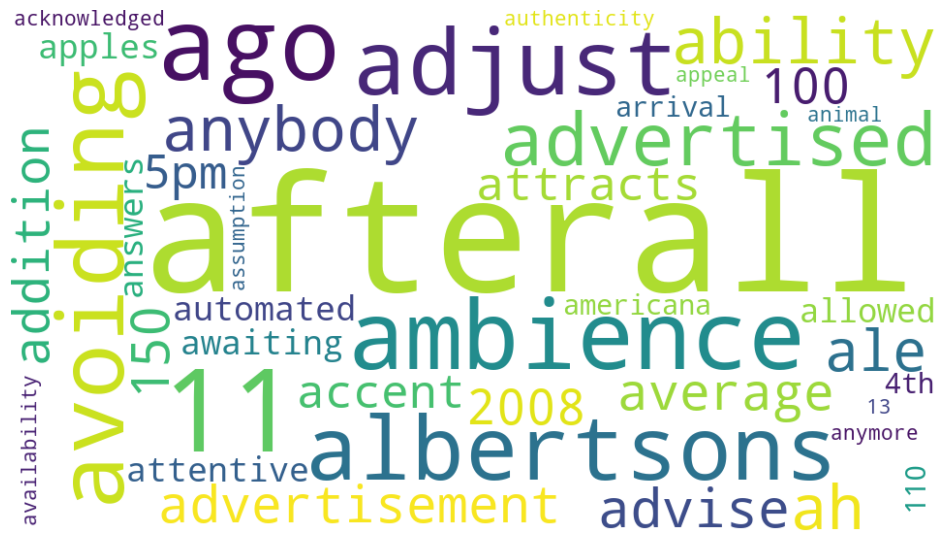

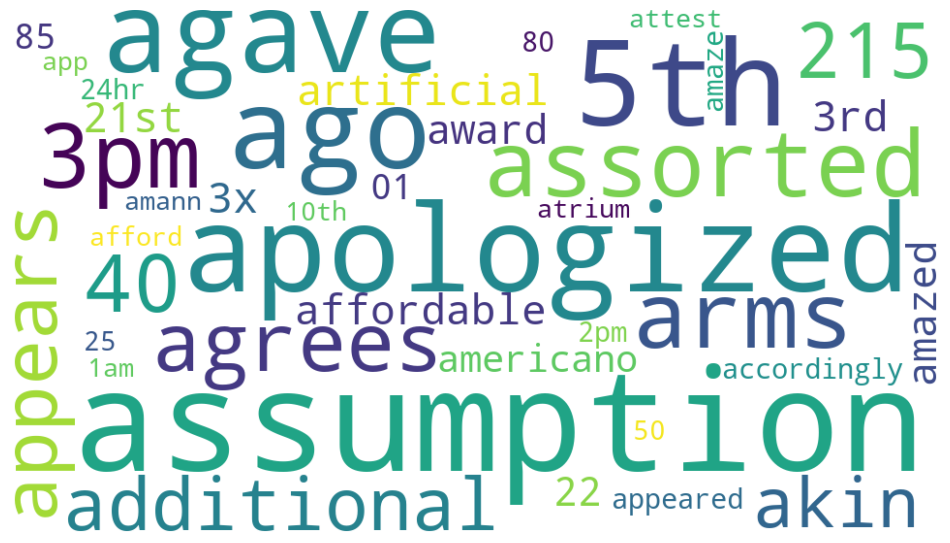

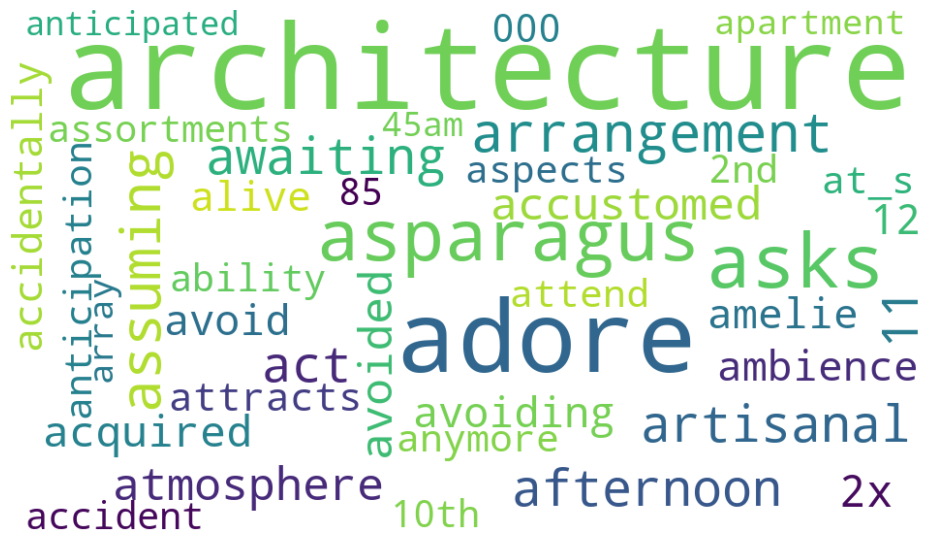

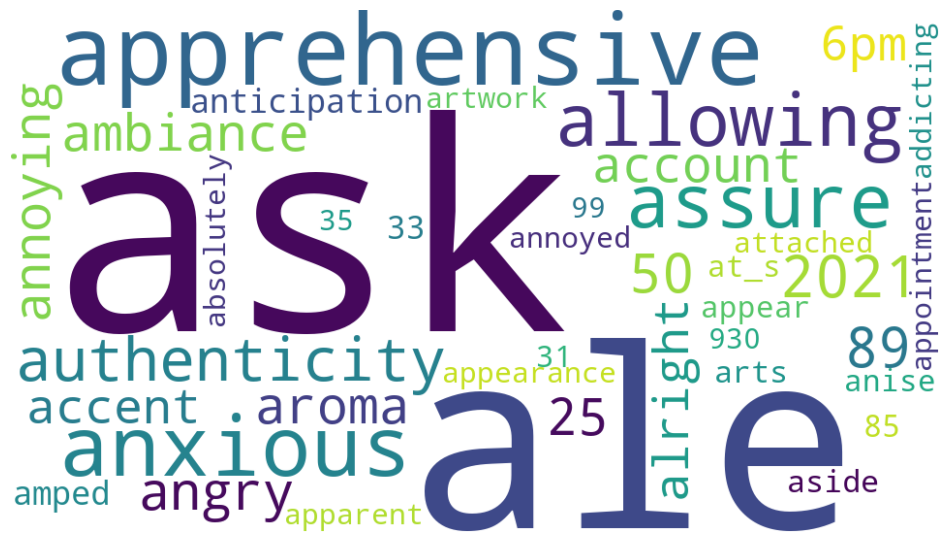

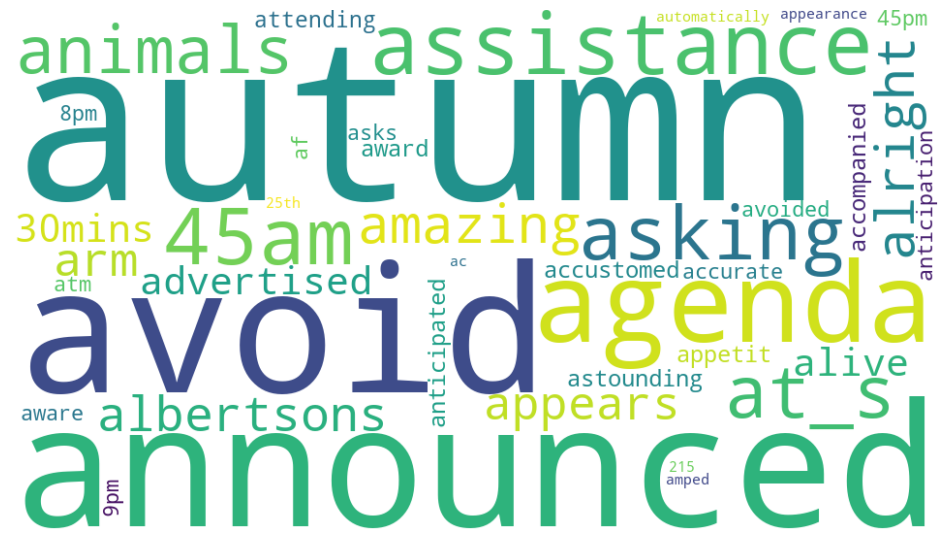

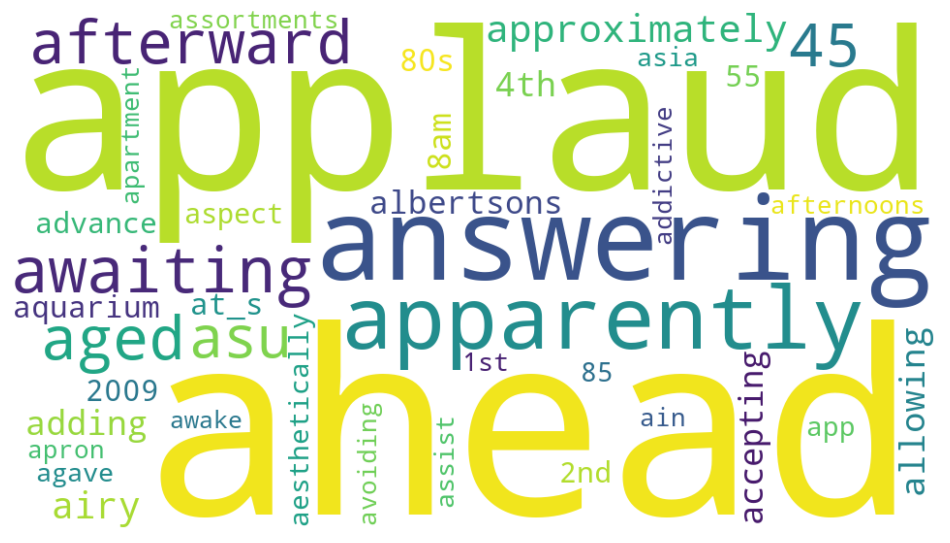

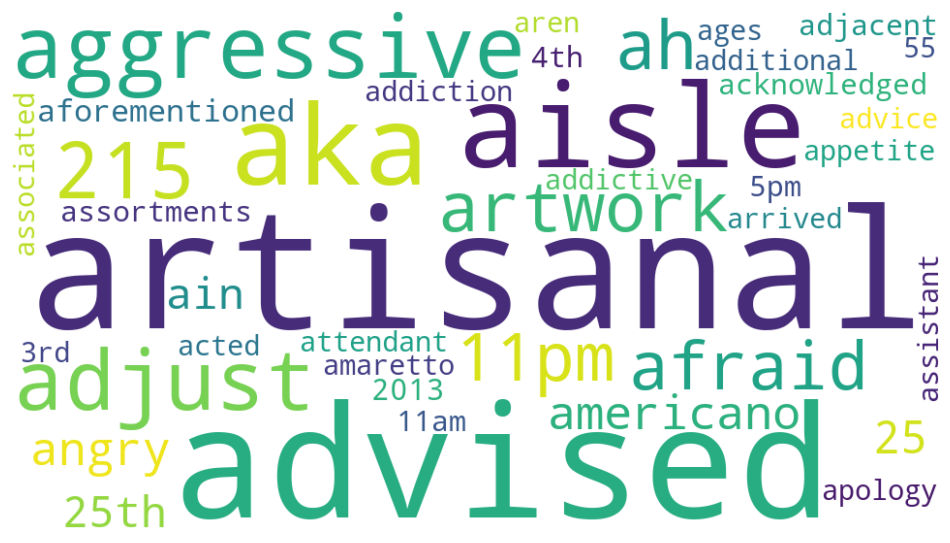

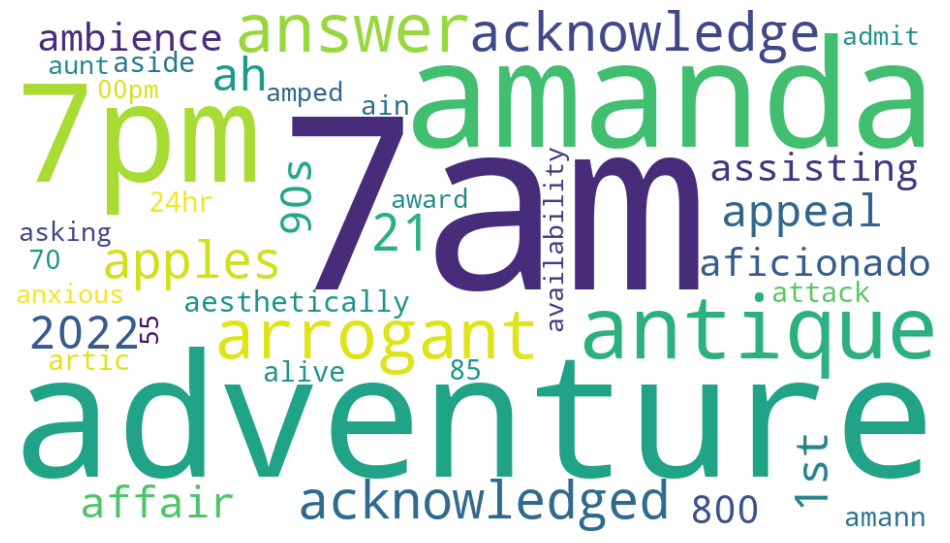

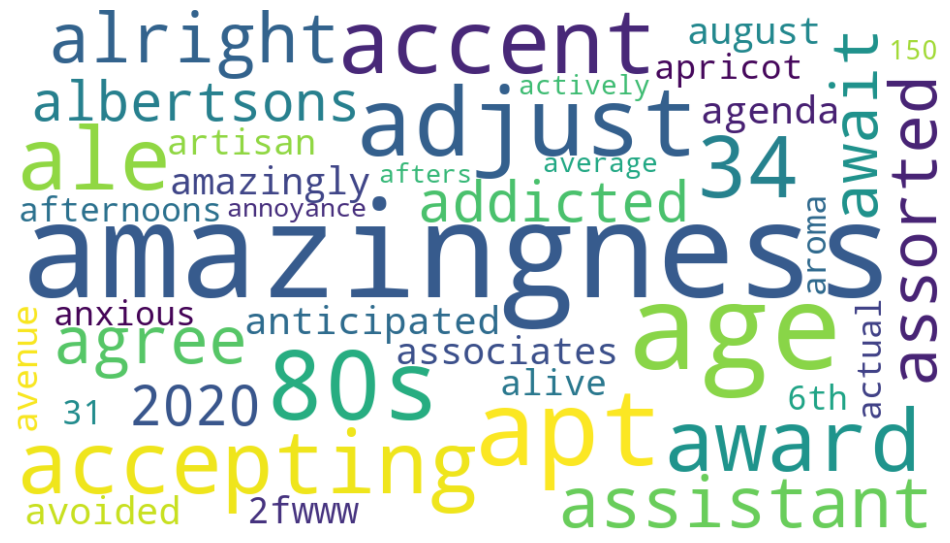

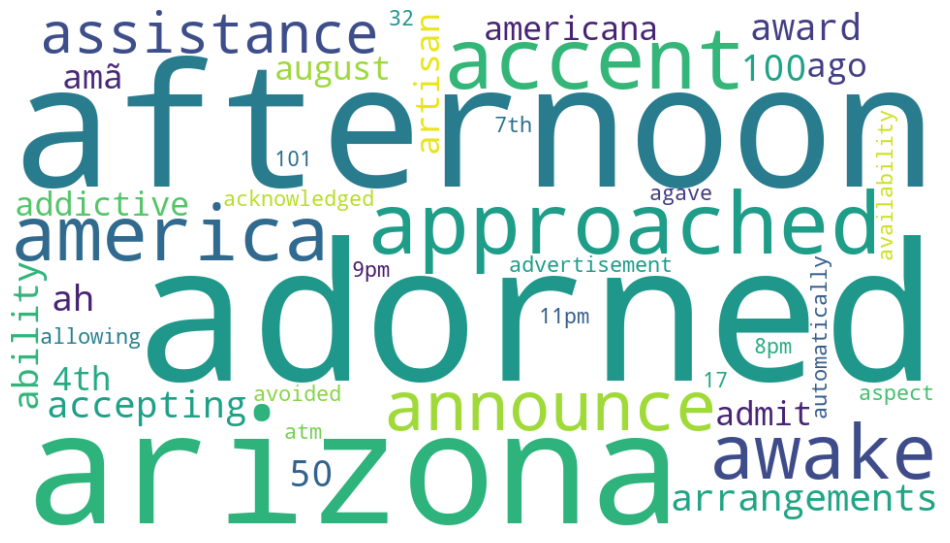

In [85]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

## Creating Word Clouds for LDA Topics

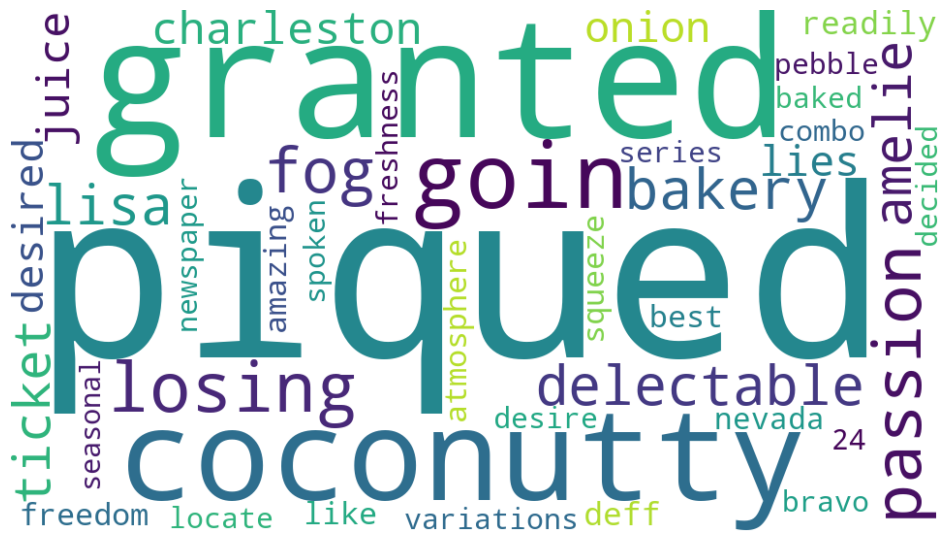

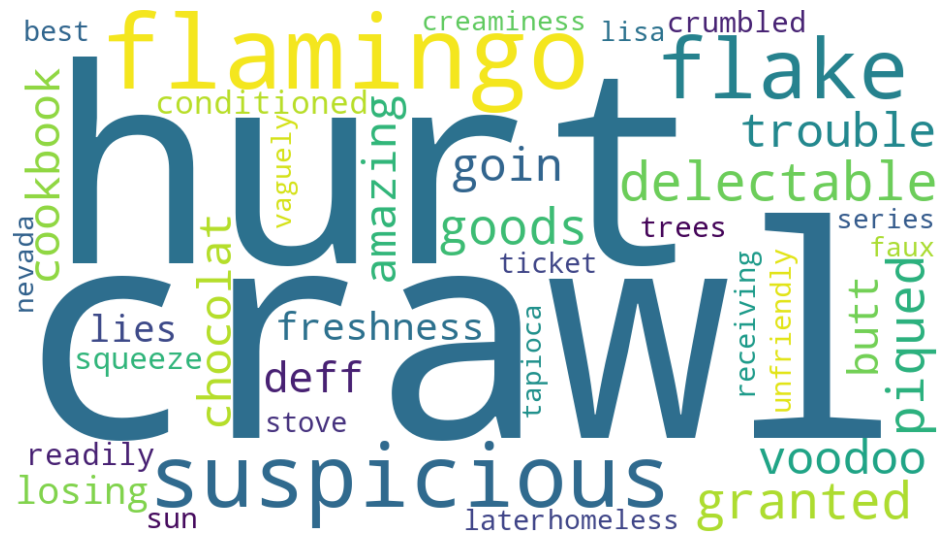

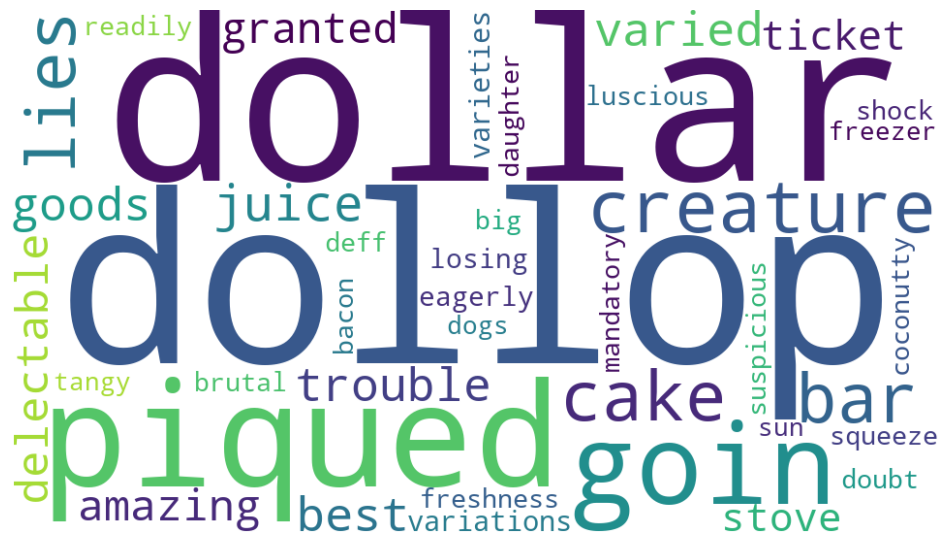

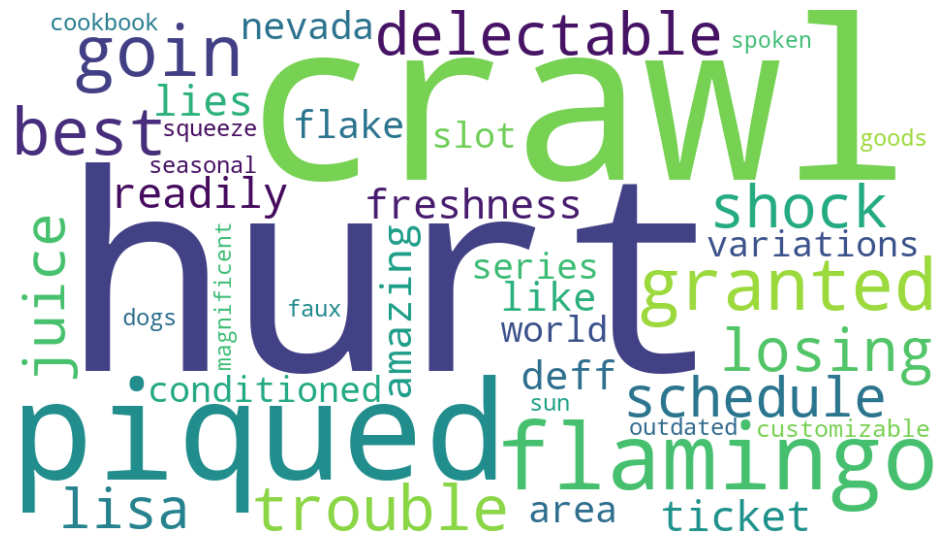

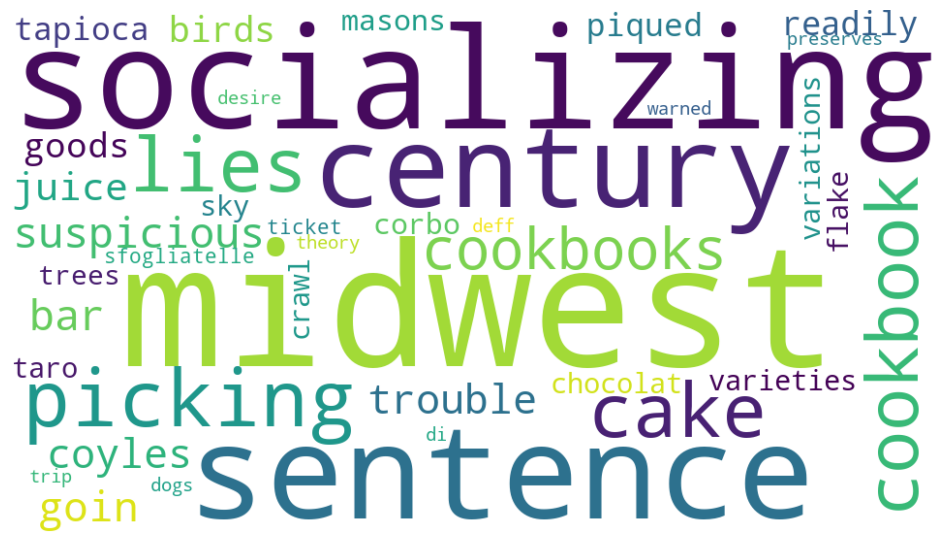

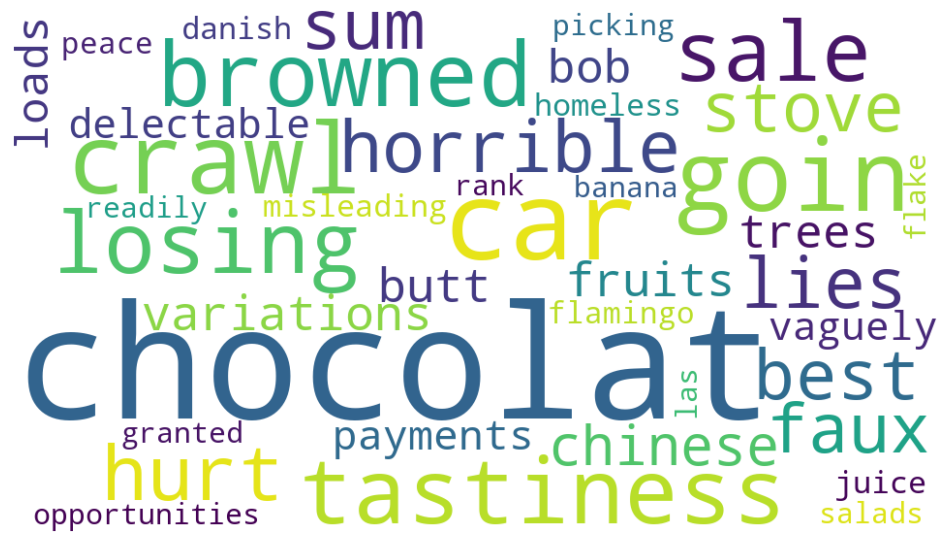

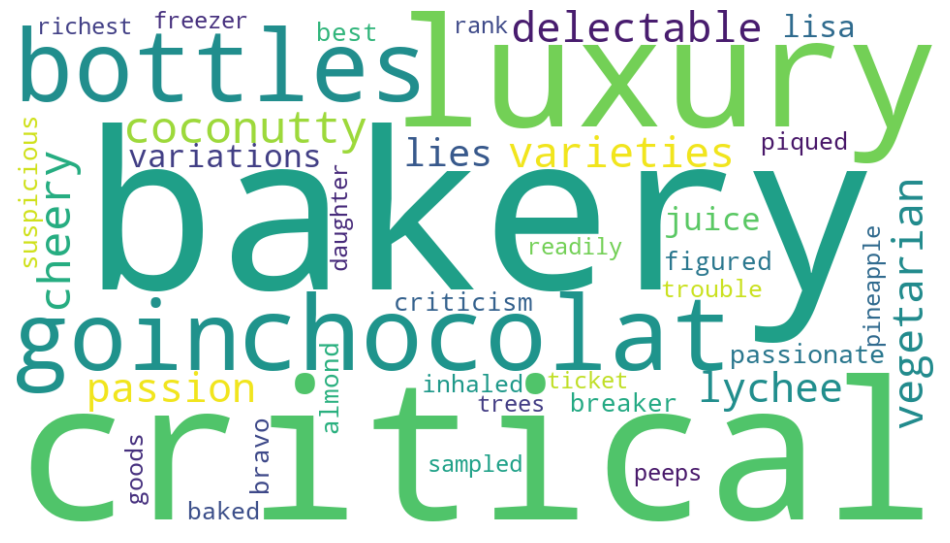

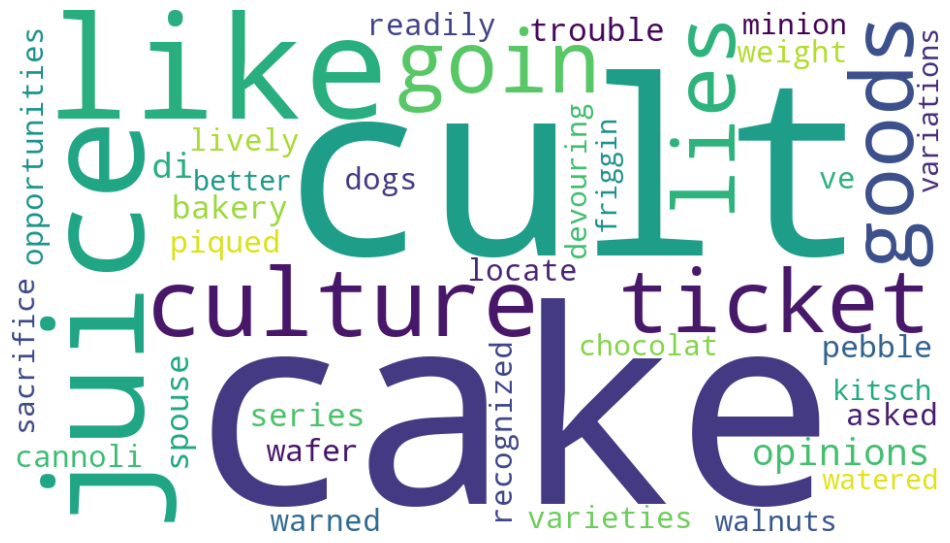

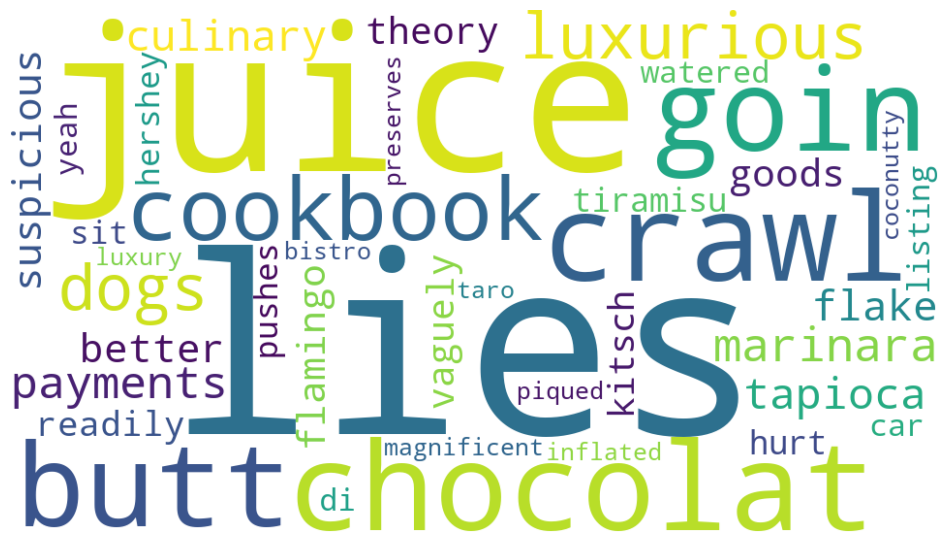

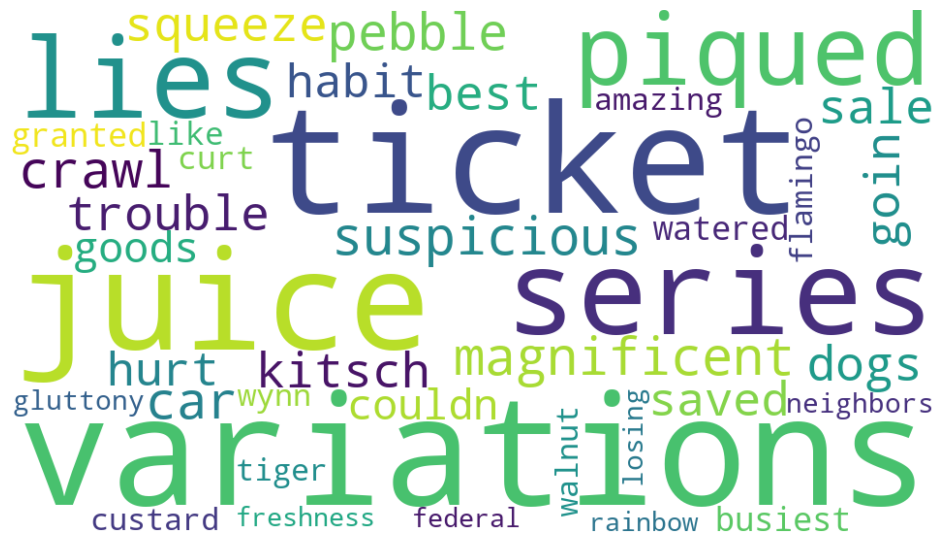

In [86]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## Extracting Top Words for NMF Topics

In [112]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

## Calculating Topic Distribution by Year

In [113]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

unique_years = np.unique(paragraph_df["year"])

for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/4396 [00:00<?, ?it/s]

## Plotting Topic Distribution Over Time

<Axes: xlabel='price'>

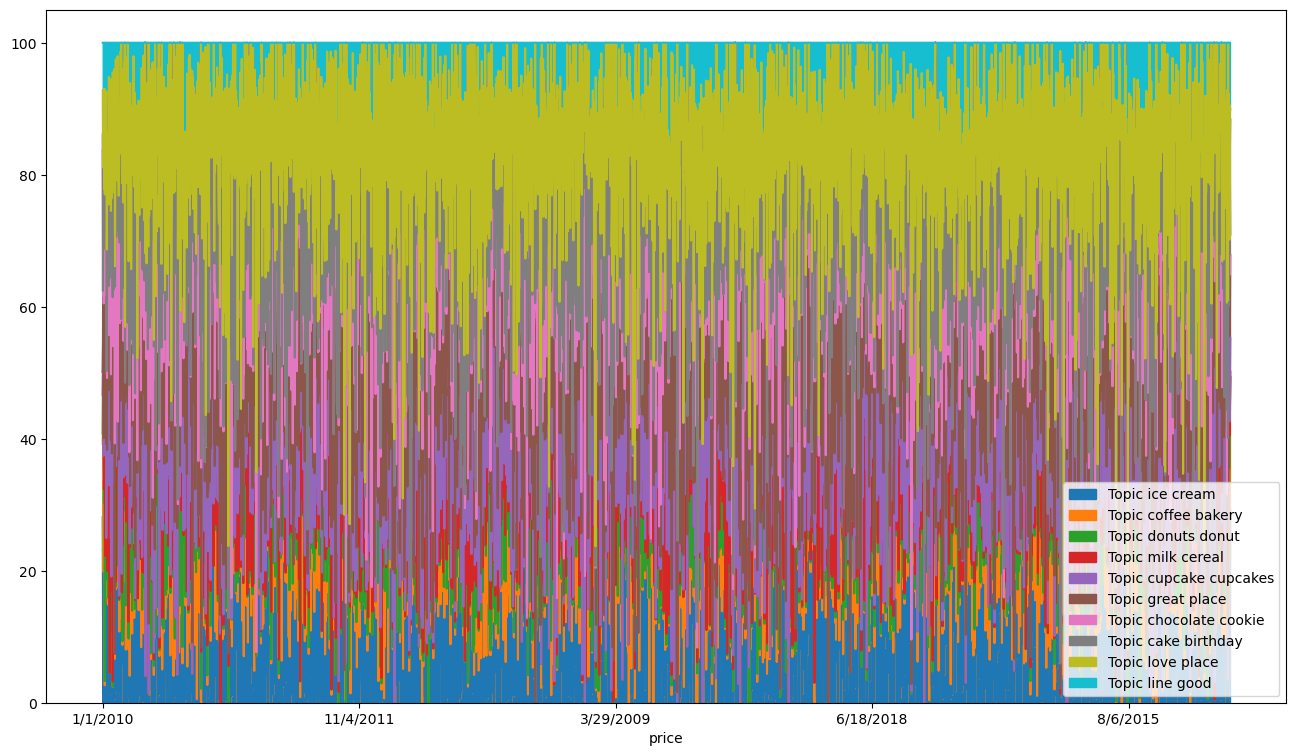

In [114]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")
df_year.plot.area(figsize=(16,9))